# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,218]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            keras.layers.Dense(units = n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units = output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [20]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 500
BATCH_SIZE = 256
LEARNING_RATE = [0.1,0.01, 0.001]
OPTIMIZER = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']


In [21]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for j, optnm in enumerate(OPTIMIZER):
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f, OPT = %s" % (lr, optnm))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if optnm == 'SGD':
            opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=0.95, decay=1e-6)
        elif optnm == 'RMSprop':
            opt = keras.optimizers.RMSprop(lr=lr, decay=1e-6)
        elif optnm == 'AdaGrad':
            opt = keras.optimizers.Adagrad(lr=lr, decay=1e-6)
        elif optnm == 'Adam':
            opt = keras.optimizers.Adam(lr=lr, decay=1e-6)
            
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr=%s, pot=%s" % (str(lr),optnm)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.100000, OPT = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 102us/step - loss: 2.3558 - accuracy: 0.1720 - val_loss: 2.0767 - val_accuracy: 0.1803
Epoch 2/500
50000/50000 [==============================] - 5s 96us/step - loss: 2.3097 - accuracy: 0.1206 - val_loss: 2.2046 - val_accuracy

50000/50000 [==============================] - 5s 99us/step - loss: 2.3043 - accuracy: 0.1008 - val_loss: 2.3043 - val_accuracy: 0.1001
Epoch 51/500
50000/50000 [==============================] - 5s 101us/step - loss: 2.3045 - accuracy: 0.0996 - val_loss: 2.3043 - val_accuracy: 0.1001
Epoch 52/500
50000/50000 [==============================] - 5s 108us/step - loss: 2.3039 - accuracy: 0.0999 - val_loss: 2.3034 - val_accuracy: 0.1001
Epoch 53/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.3040 - accuracy: 0.0987 - val_loss: 2.3032 - val_accuracy: 0.1002
Epoch 54/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.2979 - accuracy: 0.1054 - val_loss: 2.3107 - val_accuracy: 0.1000
Epoch 55/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.3055 - accuracy: 0.1017 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 56/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.3044 - accuracy: 0.0994 - val_lo

50000/50000 [==============================] - 5s 97us/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 105/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3037 - accuracy: 0.1018 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 106/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3041 - accuracy: 0.1003 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 107/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3043 - accuracy: 0.0984 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 108/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3041 - accuracy: 0.1002 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 109/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.1000 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 110/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3044 - accuracy: 0.0969 - val_

50000/50000 [==============================] - 5s 99us/step - loss: 2.3038 - accuracy: 0.0975 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 159/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.3043 - accuracy: 0.0982 - val_loss: 2.3030 - val_accuracy: 0.0999
Epoch 160/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.3041 - accuracy: 0.0982 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 161/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.3040 - accuracy: 0.0996 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 162/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.3042 - accuracy: 0.1013 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 163/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.3042 - accuracy: 0.1009 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 164/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.3043 - accuracy: 0.0990 - va

50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.1019 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 213/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3038 - accuracy: 0.0988 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 214/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3041 - accuracy: 0.0996 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 215/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3039 - accuracy: 0.0994 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 216/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3037 - accuracy: 0.0990 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 217/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3041 - accuracy: 0.0977 - val_loss: 2.3041 - val_accuracy: 0.0999
Epoch 218/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.0996 - val_

Epoch 267/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3045 - accuracy: 0.0973 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 268/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3038 - accuracy: 0.0993 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 269/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.0978 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 270/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3038 - accuracy: 0.1024 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 271/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3037 - accuracy: 0.1003 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 272/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3040 - accuracy: 0.0996 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 273/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3043 - accuracy:

50000/50000 [==============================] - 5s 97us/step - loss: 2.3038 - accuracy: 0.1010 - val_loss: 2.3037 - val_accuracy: 0.0999
Epoch 322/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3040 - accuracy: 0.0994 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 323/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.1003 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 324/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.1008 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 325/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3045 - accuracy: 0.0971 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 326/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3040 - accuracy: 0.1010 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 327/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3041 - accuracy: 0.1003 - val_

50000/50000 [==============================] - 5s 108us/step - loss: 2.3040 - accuracy: 0.0971 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 376/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.3041 - accuracy: 0.1001 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 377/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3043 - accuracy: 0.0983 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 378/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3038 - accuracy: 0.0997 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 379/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3040 - accuracy: 0.1008 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 380/500
50000/50000 [==============================] - 5s 101us/step - loss: 2.3040 - accuracy: 0.1004 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 381/500
50000/50000 [==============================] - 5s 102us/step - loss: 2.3040 - accuracy: 0.1000 - v

Epoch 430/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.3039 - accuracy: 0.0991 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 431/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3039 - accuracy: 0.1013 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 432/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3040 - accuracy: 0.0985 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 433/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.0993 - val_loss: 2.3035 - val_accuracy: 0.0999
Epoch 434/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3040 - accuracy: 0.0972 - val_loss: 2.3043 - val_accuracy: 0.0999
Epoch 435/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3039 - accuracy: 0.0988 - val_loss: 2.3041 - val_accuracy: 0.1002
Epoch 436/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3041 - accuracy

50000/50000 [==============================] - 5s 97us/step - loss: 2.3042 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0999
Epoch 485/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3039 - accuracy: 0.1003 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 486/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3041 - accuracy: 0.0984 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 487/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3041 - accuracy: 0.0989 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 488/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3041 - accuracy: 0.0986 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 489/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.3038 - accuracy: 0.0985 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 490/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.3045 - accuracy: 0.1002 - val_

50000/50000 [==============================] - 6s 113us/step - loss: 2.3079 - accuracy: 0.0979 - val_loss: 2.3110 - val_accuracy: 0.0999
Epoch 34/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3079 - accuracy: 0.0991 - val_loss: 2.3192 - val_accuracy: 0.1000
Epoch 35/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3086 - accuracy: 0.0978 - val_loss: 2.3084 - val_accuracy: 0.1001
Epoch 36/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3079 - accuracy: 0.0992 - val_loss: 2.3134 - val_accuracy: 0.1001
Epoch 37/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3078 - accuracy: 0.1007 - val_loss: 2.3222 - val_accuracy: 0.1000
Epoch 38/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3076 - accuracy: 0.0992 - val_loss: 2.3119 - val_accuracy: 0.1001
Epoch 39/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3078 - accuracy: 0.1024 - val

50000/50000 [==============================] - 6s 113us/step - loss: 2.3081 - accuracy: 0.0991 - val_loss: 2.3108 - val_accuracy: 0.1001
Epoch 88/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3072 - accuracy: 0.0999 - val_loss: 2.3262 - val_accuracy: 0.1001
Epoch 89/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3077 - accuracy: 0.0993 - val_loss: 2.3136 - val_accuracy: 0.1000
Epoch 90/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3072 - accuracy: 0.1029 - val_loss: 2.3211 - val_accuracy: 0.1001
Epoch 91/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3078 - accuracy: 0.1016 - val_loss: 2.3128 - val_accuracy: 0.1001
Epoch 92/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3081 - accuracy: 0.0972 - val_loss: 2.3109 - val_accuracy: 0.1001
Epoch 93/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3075 - accuracy: 0.1001 - val

50000/50000 [==============================] - 6s 113us/step - loss: 2.3078 - accuracy: 0.1001 - val_loss: 2.3190 - val_accuracy: 0.1000
Epoch 142/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3079 - accuracy: 0.0988 - val_loss: 2.3097 - val_accuracy: 0.1001
Epoch 143/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3077 - accuracy: 0.0999 - val_loss: 2.3143 - val_accuracy: 0.1000
Epoch 144/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3070 - accuracy: 0.1009 - val_loss: 2.3121 - val_accuracy: 0.1000
Epoch 145/500
50000/50000 [==============================] - 6s 112us/step - loss: 2.3075 - accuracy: 0.1016 - val_loss: 2.3140 - val_accuracy: 0.1000
Epoch 146/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3083 - accuracy: 0.0982 - val_loss: 2.3163 - val_accuracy: 0.1001
Epoch 147/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3077 - accuracy: 0.0970

50000/50000 [==============================] - 6s 113us/step - loss: 2.3072 - accuracy: 0.1005 - val_loss: 2.3265 - val_accuracy: 0.1000
Epoch 196/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3072 - accuracy: 0.1015 - val_loss: 2.3091 - val_accuracy: 0.1001
Epoch 197/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3081 - accuracy: 0.0975 - val_loss: 2.3140 - val_accuracy: 0.1001
Epoch 198/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3075 - accuracy: 0.0986 - val_loss: 2.3143 - val_accuracy: 0.1001
Epoch 199/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3080 - accuracy: 0.0977 - val_loss: 2.3132 - val_accuracy: 0.1000
Epoch 200/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3075 - accuracy: 0.0984 - val_loss: 2.3108 - val_accuracy: 0.1001
Epoch 201/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3074 - accuracy: 0.1013

50000/50000 [==============================] - 6s 113us/step - loss: 2.3074 - accuracy: 0.0988 - val_loss: 2.3134 - val_accuracy: 0.1001
Epoch 250/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3077 - accuracy: 0.0986 - val_loss: 2.3148 - val_accuracy: 0.1001
Epoch 251/500
50000/50000 [==============================] - 6s 112us/step - loss: 2.3072 - accuracy: 0.1004 - val_loss: 2.3086 - val_accuracy: 0.1001
Epoch 252/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3077 - accuracy: 0.0984 - val_loss: 2.3151 - val_accuracy: 0.1001
Epoch 253/500
50000/50000 [==============================] - 6s 124us/step - loss: 2.3073 - accuracy: 0.1013 - val_loss: 2.3100 - val_accuracy: 0.1000
Epoch 254/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3074 - accuracy: 0.0997 - val_loss: 2.3161 - val_accuracy: 0.1000
Epoch 255/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3079 - accuracy: 0.0988

50000/50000 [==============================] - 6s 113us/step - loss: 2.3073 - accuracy: 0.0996 - val_loss: 2.3114 - val_accuracy: 0.1000
Epoch 304/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3076 - accuracy: 0.0994 - val_loss: 2.3177 - val_accuracy: 0.1000
Epoch 305/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3072 - accuracy: 0.1007 - val_loss: 2.3204 - val_accuracy: 0.1000
Epoch 306/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3073 - accuracy: 0.1019 - val_loss: 2.3118 - val_accuracy: 0.1000
Epoch 307/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.3076 - accuracy: 0.1000 - val_loss: 2.3119 - val_accuracy: 0.1001
Epoch 308/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3074 - accuracy: 0.1003 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 309/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3076 - accuracy: 0.0993

50000/50000 [==============================] - 6s 114us/step - loss: 2.3075 - accuracy: 0.0997 - val_loss: 2.3102 - val_accuracy: 0.1000
Epoch 358/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3074 - accuracy: 0.1001 - val_loss: 2.3088 - val_accuracy: 0.1001
Epoch 359/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3068 - accuracy: 0.1005 - val_loss: 2.3065 - val_accuracy: 0.1001
Epoch 360/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3075 - accuracy: 0.0996 - val_loss: 2.3091 - val_accuracy: 0.1001
Epoch 361/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3079 - accuracy: 0.0996 - val_loss: 2.3123 - val_accuracy: 0.1001
Epoch 362/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3070 - accuracy: 0.0990 - val_loss: 2.3114 - val_accuracy: 0.1001
Epoch 363/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.3076 - accuracy: 0.0974

50000/50000 [==============================] - 6s 116us/step - loss: 2.3073 - accuracy: 0.0993 - val_loss: 2.3106 - val_accuracy: 0.1000
Epoch 412/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3075 - accuracy: 0.0995 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 413/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3074 - accuracy: 0.0981 - val_loss: 2.3102 - val_accuracy: 0.1000
Epoch 414/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.3074 - accuracy: 0.0987 - val_loss: 2.3124 - val_accuracy: 0.1000
Epoch 415/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.3077 - accuracy: 0.0977 - val_loss: 2.3095 - val_accuracy: 0.1001
Epoch 416/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.3073 - accuracy: 0.0998 - val_loss: 2.3109 - val_accuracy: 0.1001
Epoch 417/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3073 - accuracy: 0.1001

50000/50000 [==============================] - 6s 116us/step - loss: 2.3071 - accuracy: 0.0980 - val_loss: 2.3079 - val_accuracy: 0.1001
Epoch 466/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3079 - accuracy: 0.0978 - val_loss: 2.3116 - val_accuracy: 0.1001
Epoch 467/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.3071 - accuracy: 0.1002 - val_loss: 2.3072 - val_accuracy: 0.1001
Epoch 468/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3077 - accuracy: 0.0967 - val_loss: 2.3082 - val_accuracy: 0.1001
Epoch 469/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3076 - accuracy: 0.0994 - val_loss: 2.3103 - val_accuracy: 0.1001
Epoch 470/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3071 - accuracy: 0.0989 - val_loss: 2.3107 - val_accuracy: 0.1001
Epoch 471/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.3072 - accuracy: 0.1000

Epoch 14/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.9271 - accuracy: 0.2749 - val_loss: 1.9319 - val_accuracy: 0.2726
Epoch 15/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.9171 - accuracy: 0.2843 - val_loss: 1.9109 - val_accuracy: 0.3009
Epoch 16/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.8897 - accuracy: 0.2938 - val_loss: 2.0768 - val_accuracy: 0.2179
Epoch 17/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.8885 - accuracy: 0.2896 - val_loss: 1.9522 - val_accuracy: 0.2549
Epoch 18/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.8783 - accuracy: 0.2990 - val_loss: 1.9357 - val_accuracy: 0.2633
Epoch 19/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.8720 - accuracy: 0.3021 - val_loss: 1.9068 - val_accuracy: 0.2869
Epoch 20/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.8636 - accuracy:

50000/50000 [==============================] - 5s 109us/step - loss: 1.7015 - accuracy: 0.3908 - val_loss: 1.7356 - val_accuracy: 0.3755
Epoch 69/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6973 - accuracy: 0.3904 - val_loss: 1.7404 - val_accuracy: 0.3688
Epoch 70/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6929 - accuracy: 0.3926 - val_loss: 1.7814 - val_accuracy: 0.3522
Epoch 71/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6953 - accuracy: 0.3922 - val_loss: 1.7647 - val_accuracy: 0.3524
Epoch 72/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6921 - accuracy: 0.3938 - val_loss: 1.7411 - val_accuracy: 0.3795
Epoch 73/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.6869 - accuracy: 0.3974 - val_loss: 1.7699 - val_accuracy: 0.3541
Epoch 74/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.6930 - accuracy: 0.3921 - val

50000/50000 [==============================] - 5s 109us/step - loss: 1.6358 - accuracy: 0.4166 - val_loss: 1.7134 - val_accuracy: 0.3865
Epoch 123/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6370 - accuracy: 0.4156 - val_loss: 1.7698 - val_accuracy: 0.3783
Epoch 124/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6344 - accuracy: 0.4169 - val_loss: 1.6891 - val_accuracy: 0.3909
Epoch 125/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6309 - accuracy: 0.4182 - val_loss: 1.7549 - val_accuracy: 0.3709
Epoch 126/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6319 - accuracy: 0.4178 - val_loss: 1.7270 - val_accuracy: 0.3895
Epoch 127/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6305 - accuracy: 0.4178 - val_loss: 1.6881 - val_accuracy: 0.3995
Epoch 128/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.6282 - accuracy: 0.4203

50000/50000 [==============================] - 5s 109us/step - loss: 1.5782 - accuracy: 0.4394 - val_loss: 1.6904 - val_accuracy: 0.3903
Epoch 177/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5814 - accuracy: 0.4381 - val_loss: 1.6821 - val_accuracy: 0.4053
Epoch 178/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5772 - accuracy: 0.4388 - val_loss: 1.6955 - val_accuracy: 0.4030
Epoch 179/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5765 - accuracy: 0.4407 - val_loss: 1.6601 - val_accuracy: 0.4088
Epoch 180/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5780 - accuracy: 0.4377 - val_loss: 1.6715 - val_accuracy: 0.4120
Epoch 181/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5780 - accuracy: 0.4385 - val_loss: 1.6719 - val_accuracy: 0.4120
Epoch 182/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5744 - accuracy: 0.4428

50000/50000 [==============================] - 5s 109us/step - loss: 1.5500 - accuracy: 0.4484 - val_loss: 1.6530 - val_accuracy: 0.4091
Epoch 231/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5490 - accuracy: 0.4473 - val_loss: 1.6566 - val_accuracy: 0.4085
Epoch 232/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5442 - accuracy: 0.4511 - val_loss: 1.6656 - val_accuracy: 0.4110
Epoch 233/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5476 - accuracy: 0.4503 - val_loss: 1.6577 - val_accuracy: 0.4094
Epoch 234/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5445 - accuracy: 0.4497 - val_loss: 1.6699 - val_accuracy: 0.4101
Epoch 235/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5437 - accuracy: 0.4509 - val_loss: 1.6968 - val_accuracy: 0.3960
Epoch 236/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5442 - accuracy: 0.4510

50000/50000 [==============================] - 5s 109us/step - loss: 1.5139 - accuracy: 0.4641 - val_loss: 1.6876 - val_accuracy: 0.4026
Epoch 285/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.5144 - accuracy: 0.4634 - val_loss: 1.6581 - val_accuracy: 0.4130
Epoch 286/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.5143 - accuracy: 0.4636 - val_loss: 1.6572 - val_accuracy: 0.4163
Epoch 287/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5153 - accuracy: 0.4633 - val_loss: 1.6697 - val_accuracy: 0.4092
Epoch 288/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.5113 - accuracy: 0.4654 - val_loss: 1.6529 - val_accuracy: 0.4212
Epoch 289/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5126 - accuracy: 0.4658 - val_loss: 1.6435 - val_accuracy: 0.4164
Epoch 290/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5124 - accuracy: 0.4626

50000/50000 [==============================] - 5s 109us/step - loss: 1.4866 - accuracy: 0.4742 - val_loss: 1.6530 - val_accuracy: 0.4180
Epoch 339/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4870 - accuracy: 0.4735 - val_loss: 1.6503 - val_accuracy: 0.4130
Epoch 340/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4878 - accuracy: 0.4719 - val_loss: 1.6637 - val_accuracy: 0.4150
Epoch 341/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4869 - accuracy: 0.4739 - val_loss: 1.6221 - val_accuracy: 0.4260
Epoch 342/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4859 - accuracy: 0.4717 - val_loss: 1.6433 - val_accuracy: 0.4209
Epoch 343/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.4864 - accuracy: 0.4731 - val_loss: 1.6246 - val_accuracy: 0.4289
Epoch 344/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4847 - accuracy: 0.4738

50000/50000 [==============================] - 5s 109us/step - loss: 1.4687 - accuracy: 0.4791 - val_loss: 1.6644 - val_accuracy: 0.4030
Epoch 393/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4693 - accuracy: 0.4796 - val_loss: 1.6468 - val_accuracy: 0.4099
Epoch 394/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4679 - accuracy: 0.4792 - val_loss: 1.6785 - val_accuracy: 0.4136
Epoch 395/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4707 - accuracy: 0.4772 - val_loss: 1.6735 - val_accuracy: 0.4146
Epoch 396/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4690 - accuracy: 0.4795 - val_loss: 1.6314 - val_accuracy: 0.4208
Epoch 397/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4695 - accuracy: 0.4778 - val_loss: 1.6588 - val_accuracy: 0.4067
Epoch 398/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.4674 - accuracy: 0.4787

50000/50000 [==============================] - 5s 109us/step - loss: 1.4539 - accuracy: 0.4851 - val_loss: 1.6457 - val_accuracy: 0.4171
Epoch 447/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4534 - accuracy: 0.4842 - val_loss: 1.6332 - val_accuracy: 0.4168
Epoch 448/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.4558 - accuracy: 0.4829 - val_loss: 1.6360 - val_accuracy: 0.4242
Epoch 449/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4521 - accuracy: 0.4851 - val_loss: 1.6357 - val_accuracy: 0.4199
Epoch 450/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4554 - accuracy: 0.4840 - val_loss: 1.6646 - val_accuracy: 0.4093
Epoch 451/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4541 - accuracy: 0.4839 - val_loss: 1.6301 - val_accuracy: 0.4265
Epoch 452/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4518 - accuracy: 0.4847

50000/50000 [==============================] - 5s 109us/step - loss: 1.4414 - accuracy: 0.4888 - val_loss: 1.6237 - val_accuracy: 0.4254
Experiment with LR = 0.100000, OPT = Adam
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 133us/step - loss: 55.8500 - accuracy: 0.0985 - val_loss: 2.3031 - val_accuracy: 0.1000


50000/50000 [==============================] - 7s 138us/step - loss: 2.3072 - accuracy: 0.0989 - val_loss: 2.3082 - val_accuracy: 0.1000
Epoch 50/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.3080 - accuracy: 0.1007 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 51/500
50000/50000 [==============================] - 7s 136us/step - loss: 2.3070 - accuracy: 0.1002 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 52/500
50000/50000 [==============================] - 7s 135us/step - loss: 2.3072 - accuracy: 0.0988 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 53/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.3067 - accuracy: 0.1004 - val_loss: 2.3106 - val_accuracy: 0.1000
Epoch 54/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3068 - accuracy: 0.0985 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 55/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3073 - accuracy: 0.1017 - val

Epoch 104/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.3070 - accuracy: 0.1017 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 105/500
50000/50000 [==============================] - 7s 134us/step - loss: 2.3068 - accuracy: 0.1013 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 106/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3063 - accuracy: 0.0986 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 107/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3067 - accuracy: 0.1018 - val_loss: 2.3065 - val_accuracy: 0.1000
Epoch 108/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.3070 - accuracy: 0.0974 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 109/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3066 - accuracy: 0.0994 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 110/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.3066 - ac

50000/50000 [==============================] - 7s 133us/step - loss: 2.3066 - accuracy: 0.0989 - val_loss: 2.3065 - val_accuracy: 0.1000
Epoch 159/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.3067 - accuracy: 0.0996 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 160/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3069 - accuracy: 0.0985 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 161/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3067 - accuracy: 0.0986 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 162/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3065 - accuracy: 0.1018 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 163/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3063 - accuracy: 0.1002 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 164/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3068 - accuracy: 0.0995

50000/50000 [==============================] - 7s 132us/step - loss: 2.3063 - accuracy: 0.0992 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 213/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3070 - accuracy: 0.0994 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 214/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3061 - accuracy: 0.1014 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 215/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3070 - accuracy: 0.1005 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 216/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3066 - accuracy: 0.1001 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 217/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3077 - accuracy: 0.0984 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 218/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3069 - accuracy: 0.0986

50000/50000 [==============================] - 7s 132us/step - loss: 2.3062 - accuracy: 0.0984 - val_loss: 2.3083 - val_accuracy: 0.1000
Epoch 267/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3072 - accuracy: 0.0996 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 268/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3066 - accuracy: 0.1027 - val_loss: 2.3084 - val_accuracy: 0.1000
Epoch 269/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3071 - accuracy: 0.0993 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 270/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3067 - accuracy: 0.1009 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 271/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3068 - accuracy: 0.0996 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 272/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3066 - accuracy: 0.0999

50000/50000 [==============================] - 7s 132us/step - loss: 2.3061 - accuracy: 0.1011 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 321/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3062 - accuracy: 0.1001 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 322/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3065 - accuracy: 0.1008 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 323/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3066 - accuracy: 0.1002 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 324/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3073 - accuracy: 0.1002 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 325/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3069 - accuracy: 0.1002 - val_loss: 2.3071 - val_accuracy: 0.1000
Epoch 326/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3067 - accuracy: 0.0994

50000/50000 [==============================] - 7s 133us/step - loss: 2.3064 - accuracy: 0.0982 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 375/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3074 - accuracy: 0.0993 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 376/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3065 - accuracy: 0.1009 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 377/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3065 - accuracy: 0.1005 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 378/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3064 - accuracy: 0.0977 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 379/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3066 - accuracy: 0.0978 - val_loss: 2.3071 - val_accuracy: 0.1000
Epoch 380/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.3073 - accuracy: 0.1009

50000/50000 [==============================] - 7s 131us/step - loss: 2.3073 - accuracy: 0.0987 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 429/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3069 - accuracy: 0.0994 - val_loss: 2.3083 - val_accuracy: 0.1000
Epoch 430/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3063 - accuracy: 0.1003 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 431/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3061 - accuracy: 0.1013 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 432/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3061 - accuracy: 0.1008 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 433/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3063 - accuracy: 0.1010 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 434/500
50000/50000 [==============================] - 7s 136us/step - loss: 2.3068 - accuracy: 0.0997

50000/50000 [==============================] - 7s 132us/step - loss: 2.3070 - accuracy: 0.0984 - val_loss: 2.3082 - val_accuracy: 0.1000
Epoch 483/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3072 - accuracy: 0.0991 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 484/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3070 - accuracy: 0.1016 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 485/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3064 - accuracy: 0.0999 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 486/500
50000/50000 [==============================] - 7s 132us/step - loss: 2.3070 - accuracy: 0.1010 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 487/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3068 - accuracy: 0.1024 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 488/500
50000/50000 [==============================] - 7s 131us/step - loss: 2.3071 - accuracy: 0.0986

50000/50000 [==============================] - 5s 102us/step - loss: 0.9530 - accuracy: 0.6653 - val_loss: 1.4339 - val_accuracy: 0.5145
Epoch 32/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.9382 - accuracy: 0.6682 - val_loss: 1.4861 - val_accuracy: 0.5122
Epoch 33/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.9280 - accuracy: 0.6753 - val_loss: 1.4840 - val_accuracy: 0.5138
Epoch 34/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.9116 - accuracy: 0.6812 - val_loss: 1.4502 - val_accuracy: 0.5178
Epoch 35/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8947 - accuracy: 0.6880 - val_loss: 1.5009 - val_accuracy: 0.5158
Epoch 36/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8866 - accuracy: 0.6890 - val_loss: 1.5111 - val_accuracy: 0.5094
Epoch 37/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.8813 - accuracy: 0.6896 - val

50000/50000 [==============================] - 5s 103us/step - loss: 0.3813 - accuracy: 0.8714 - val_loss: 2.2004 - val_accuracy: 0.5101
Epoch 86/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.3663 - accuracy: 0.8768 - val_loss: 2.2437 - val_accuracy: 0.5089
Epoch 87/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.3651 - accuracy: 0.8764 - val_loss: 2.1308 - val_accuracy: 0.5199
Epoch 88/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3537 - accuracy: 0.8818 - val_loss: 2.1780 - val_accuracy: 0.5032
Epoch 89/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3553 - accuracy: 0.8782 - val_loss: 2.1313 - val_accuracy: 0.5177
Epoch 90/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.3459 - accuracy: 0.8826 - val_loss: 2.2037 - val_accuracy: 0.5095
Epoch 91/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3373 - accuracy: 0.8862 - val

50000/50000 [==============================] - 5s 102us/step - loss: 0.1162 - accuracy: 0.9670 - val_loss: 2.9583 - val_accuracy: 0.5185
Epoch 140/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1101 - accuracy: 0.9686 - val_loss: 2.9668 - val_accuracy: 0.5070
Epoch 141/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1157 - accuracy: 0.9664 - val_loss: 2.9982 - val_accuracy: 0.5061
Epoch 142/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1176 - accuracy: 0.9659 - val_loss: 2.9993 - val_accuracy: 0.5120
Epoch 143/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1093 - accuracy: 0.9704 - val_loss: 2.9876 - val_accuracy: 0.5183
Epoch 144/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1003 - accuracy: 0.9727 - val_loss: 3.0181 - val_accuracy: 0.5080
Epoch 145/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0992 - accuracy: 0.9732

50000/50000 [==============================] - 5s 102us/step - loss: 0.0253 - accuracy: 0.9968 - val_loss: 3.5478 - val_accuracy: 0.5156
Epoch 194/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0237 - accuracy: 0.9970 - val_loss: 3.5376 - val_accuracy: 0.5135
Epoch 195/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0237 - accuracy: 0.9974 - val_loss: 3.5462 - val_accuracy: 0.5166
Epoch 196/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0228 - accuracy: 0.9974 - val_loss: 3.5760 - val_accuracy: 0.5118
Epoch 197/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0228 - accuracy: 0.9972 - val_loss: 3.6171 - val_accuracy: 0.5116
Epoch 198/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0237 - accuracy: 0.9969 - val_loss: 3.5520 - val_accuracy: 0.5192
Epoch 199/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0212 - accuracy: 0.9976

50000/50000 [==============================] - 5s 103us/step - loss: 0.0078 - accuracy: 0.9997 - val_loss: 3.8250 - val_accuracy: 0.5160
Epoch 248/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0080 - accuracy: 0.9997 - val_loss: 3.8387 - val_accuracy: 0.5165
Epoch 249/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0078 - accuracy: 0.9997 - val_loss: 3.8450 - val_accuracy: 0.5178
Epoch 250/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0070 - accuracy: 0.9998 - val_loss: 3.8417 - val_accuracy: 0.5152
Epoch 251/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0072 - accuracy: 0.9998 - val_loss: 3.8474 - val_accuracy: 0.5170
Epoch 252/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0072 - accuracy: 0.9997 - val_loss: 3.8488 - val_accuracy: 0.5173
Epoch 253/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0071 - accuracy: 0.9998

50000/50000 [==============================] - 5s 102us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.0100 - val_accuracy: 0.5188
Epoch 302/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.0177 - val_accuracy: 0.5185
Epoch 303/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.0254 - val_accuracy: 0.5181
Epoch 304/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.0215 - val_accuracy: 0.5158
Epoch 305/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 4.0241 - val_accuracy: 0.5187
Epoch 306/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 4.0260 - val_accuracy: 0.5170
Epoch 307/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0041 - accuracy: 1.0000

50000/50000 [==============================] - 5s 101us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 4.1304 - val_accuracy: 0.5194
Epoch 356/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 4.1408 - val_accuracy: 0.5167
Epoch 357/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.1494 - val_accuracy: 0.5187
Epoch 358/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 4.1424 - val_accuracy: 0.5180
Epoch 359/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 4.1479 - val_accuracy: 0.5189
Epoch 360/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 4.1454 - val_accuracy: 0.5186
Epoch 361/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0029 - accuracy: 1.0000

50000/50000 [==============================] - 5s 103us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.2364 - val_accuracy: 0.5167
Epoch 410/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.2370 - val_accuracy: 0.5160
Epoch 411/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.2446 - val_accuracy: 0.5179
Epoch 412/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.2435 - val_accuracy: 0.5179
Epoch 413/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.2523 - val_accuracy: 0.5183
Epoch 414/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.2503 - val_accuracy: 0.5185
Epoch 415/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0023 - accuracy: 1.0000

50000/50000 [==============================] - 5s 102us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.3237 - val_accuracy: 0.5174
Epoch 464/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.3282 - val_accuracy: 0.5146
Epoch 465/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.3205 - val_accuracy: 0.5172
Epoch 466/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.3266 - val_accuracy: 0.5174
Epoch 467/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.3245 - val_accuracy: 0.5156
Epoch 468/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.3271 - val_accuracy: 0.5163
Epoch 469/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0019 - accuracy: 1.0000

Epoch 12/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.9376 - accuracy: 0.2795 - val_loss: 2.0757 - val_accuracy: 0.2276
Epoch 13/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.9598 - accuracy: 0.2817 - val_loss: 1.9832 - val_accuracy: 0.2721
Epoch 14/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.9405 - accuracy: 0.2834 - val_loss: 1.9072 - val_accuracy: 0.2731
Epoch 15/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.9367 - accuracy: 0.2851 - val_loss: 2.0058 - val_accuracy: 0.2588
Epoch 16/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.9310 - accuracy: 0.2837 - val_loss: 1.9266 - val_accuracy: 0.2702
Epoch 17/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.9282 - accuracy: 0.2853 - val_loss: 2.1022 - val_accuracy: 0.2409
Epoch 18/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.9261 - accuracy:

50000/50000 [==============================] - 6s 119us/step - loss: 1.8712 - accuracy: 0.3162 - val_loss: 2.0984 - val_accuracy: 0.2271
Epoch 67/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.8726 - accuracy: 0.3125 - val_loss: 1.8705 - val_accuracy: 0.3185
Epoch 68/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8694 - accuracy: 0.3129 - val_loss: 2.0234 - val_accuracy: 0.2853
Epoch 69/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.8717 - accuracy: 0.3142 - val_loss: 2.0419 - val_accuracy: 0.2873
Epoch 70/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8735 - accuracy: 0.3131 - val_loss: 2.1263 - val_accuracy: 0.2901
Epoch 71/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8728 - accuracy: 0.3141 - val_loss: 1.9605 - val_accuracy: 0.2924.8741 - 
Epoch 72/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8674 - accuracy: 0.31

50000/50000 [==============================] - 6s 117us/step - loss: 1.8536 - accuracy: 0.3221 - val_loss: 2.3914 - val_accuracy: 0.2403
Epoch 121/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8540 - accuracy: 0.3212 - val_loss: 2.0686 - val_accuracy: 0.2352
Epoch 122/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8559 - accuracy: 0.3194 - val_loss: 2.1994 - val_accuracy: 0.2535
Epoch 123/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8569 - accuracy: 0.3202 - val_loss: 1.9982 - val_accuracy: 0.2669
Epoch 124/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8517 - accuracy: 0.3221 - val_loss: 1.9549 - val_accuracy: 0.2996
Epoch 125/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8469 - accuracy: 0.3263 - val_loss: 2.0428 - val_accuracy: 0.2619
Epoch 126/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8584 - accuracy: 0.3178

50000/50000 [==============================] - 6s 117us/step - loss: 1.8399 - accuracy: 0.3270 - val_loss: 1.9913 - val_accuracy: 0.2746
Epoch 175/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8413 - accuracy: 0.3257 - val_loss: 1.9694 - val_accuracy: 0.2821
Epoch 176/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8436 - accuracy: 0.3244 - val_loss: 2.2533 - val_accuracy: 0.2433
Epoch 177/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8416 - accuracy: 0.3270 - val_loss: 1.9308 - val_accuracy: 0.2928
Epoch 178/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8426 - accuracy: 0.3237 - val_loss: 2.0179 - val_accuracy: 0.2606
Epoch 179/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8433 - accuracy: 0.3220 - val_loss: 1.9078 - val_accuracy: 0.2766
Epoch 180/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8427 - accuracy: 0.3214

50000/50000 [==============================] - 6s 117us/step - loss: 1.8341 - accuracy: 0.3280 - val_loss: 1.8706 - val_accuracy: 0.3336
Epoch 229/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8348 - accuracy: 0.3276 - val_loss: 1.9666 - val_accuracy: 0.3078
Epoch 230/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8362 - accuracy: 0.3295 - val_loss: 2.0877 - val_accuracy: 0.2409
Epoch 231/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8327 - accuracy: 0.3279 - val_loss: 2.0356 - val_accuracy: 0.2855
Epoch 232/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8353 - accuracy: 0.3290 - val_loss: 1.9102 - val_accuracy: 0.2991
Epoch 233/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.8302 - accuracy: 0.3309 - val_loss: 2.0282 - val_accuracy: 0.2909
Epoch 234/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8348 - accuracy: 0.3276

50000/50000 [==============================] - 6s 116us/step - loss: 1.8257 - accuracy: 0.3276 - val_loss: 1.9596 - val_accuracy: 0.2840
Epoch 283/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8239 - accuracy: 0.3316 - val_loss: 1.9740 - val_accuracy: 0.3012
Epoch 284/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8269 - accuracy: 0.3318 - val_loss: 1.9857 - val_accuracy: 0.2828
Epoch 285/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8250 - accuracy: 0.3309 - val_loss: 1.9147 - val_accuracy: 0.2748
Epoch 286/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8208 - accuracy: 0.3314 - val_loss: 2.1135 - val_accuracy: 0.2671
Epoch 287/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8227 - accuracy: 0.3342 - val_loss: 1.9539 - val_accuracy: 0.2918
Epoch 288/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.8198 - accuracy: 0.3339

50000/50000 [==============================] - 6s 117us/step - loss: 1.8149 - accuracy: 0.3330 - val_loss: 1.9381 - val_accuracy: 0.3135
Epoch 337/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8184 - accuracy: 0.3322 - val_loss: 1.9183 - val_accuracy: 0.2886
Epoch 338/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8148 - accuracy: 0.3326 - val_loss: 1.9630 - val_accuracy: 0.3034
Epoch 339/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.8174 - accuracy: 0.3334 - val_loss: 1.8906 - val_accuracy: 0.3148
Epoch 340/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8190 - accuracy: 0.3335 - val_loss: 1.8645 - val_accuracy: 0.3340
Epoch 341/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8151 - accuracy: 0.3318 - val_loss: 1.9467 - val_accuracy: 0.3074
Epoch 342/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8163 - accuracy: 0.3341

50000/50000 [==============================] - 6s 117us/step - loss: 1.8151 - accuracy: 0.3356 - val_loss: 1.9491 - val_accuracy: 0.2982
Epoch 391/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8160 - accuracy: 0.3358 - val_loss: 1.9125 - val_accuracy: 0.3373
Epoch 392/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8096 - accuracy: 0.3362 - val_loss: 2.2898 - val_accuracy: 0.2293
Epoch 393/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8154 - accuracy: 0.3363 - val_loss: 2.1813 - val_accuracy: 0.2647
Epoch 394/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8124 - accuracy: 0.3337 - val_loss: 2.0316 - val_accuracy: 0.2848
Epoch 395/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8148 - accuracy: 0.3325 - val_loss: 1.9465 - val_accuracy: 0.2962
Epoch 396/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.8118 - accuracy: 0.3379

50000/50000 [==============================] - 6s 117us/step - loss: 1.8040 - accuracy: 0.3365 - val_loss: 2.2319 - val_accuracy: 0.2317
Epoch 445/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8074 - accuracy: 0.3361 - val_loss: 2.0189 - val_accuracy: 0.2549
Epoch 446/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.8031 - accuracy: 0.3380 - val_loss: 2.0770 - val_accuracy: 0.2869
Epoch 447/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8097 - accuracy: 0.3346 - val_loss: 2.0223 - val_accuracy: 0.3114
Epoch 448/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8088 - accuracy: 0.3368 - val_loss: 2.0656 - val_accuracy: 0.2924
Epoch 449/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8120 - accuracy: 0.3349 - val_loss: 1.9622 - val_accuracy: 0.3041
Epoch 450/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8093 - accuracy: 0.3355

50000/50000 [==============================] - 6s 117us/step - loss: 1.8047 - accuracy: 0.3380 - val_loss: 1.9418 - val_accuracy: 0.2868
Epoch 499/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.8003 - accuracy: 0.3396 - val_loss: 1.9233 - val_accuracy: 0.3094
Epoch 500/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.8016 - accuracy: 0.3389 - val_loss: 2.0045 - val_accuracy: 0.2768
Experiment with LR = 0.010000, OPT = AdaGrad
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,578,506
Trainable par

50000/50000 [==============================] - 6s 111us/step - loss: 1.3993 - accuracy: 0.5171 - val_loss: 1.4926 - val_accuracy: 0.4740
Epoch 48/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.3948 - accuracy: 0.5184 - val_loss: 1.4749 - val_accuracy: 0.4798
Epoch 49/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.3933 - accuracy: 0.5180 - val_loss: 1.4762 - val_accuracy: 0.4795
Epoch 50/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.3905 - accuracy: 0.5181 - val_loss: 1.4768 - val_accuracy: 0.4670
Epoch 51/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.3857 - accuracy: 0.5204 - val_loss: 1.4815 - val_accuracy: 0.4766
Epoch 52/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.3829 - accuracy: 0.5215 - val_loss: 1.4789 - val_accuracy: 0.4725
Epoch 53/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.3803 - accuracy: 0.5221 - val

Epoch 102/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.2701 - accuracy: 0.5612 - val_loss: 1.4320 - val_accuracy: 0.4953
Epoch 103/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.2678 - accuracy: 0.5619 - val_loss: 1.4187 - val_accuracy: 0.4963
Epoch 104/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.2680 - accuracy: 0.5632 - val_loss: 1.4437 - val_accuracy: 0.4867
Epoch 105/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.2646 - accuracy: 0.5639 - val_loss: 1.4272 - val_accuracy: 0.4956
Epoch 106/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.2634 - accuracy: 0.5634 - val_loss: 1.4084 - val_accuracy: 0.5024
Epoch 107/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.2612 - accuracy: 0.5651 - val_loss: 1.4133 - val_accuracy: 0.4981
Epoch 108/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.2612 - ac

50000/50000 [==============================] - 6s 111us/step - loss: 1.1968 - accuracy: 0.5889 - val_loss: 1.3894 - val_accuracy: 0.5084
Epoch 157/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1953 - accuracy: 0.5881 - val_loss: 1.4096 - val_accuracy: 0.5006
Epoch 158/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1943 - accuracy: 0.5875 - val_loss: 1.3916 - val_accuracy: 0.5075
Epoch 159/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1930 - accuracy: 0.5899 - val_loss: 1.4543 - val_accuracy: 0.4855
Epoch 160/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1926 - accuracy: 0.5894 - val_loss: 1.4091 - val_accuracy: 0.5053
Epoch 161/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1908 - accuracy: 0.5903 - val_loss: 1.4039 - val_accuracy: 0.4993
Epoch 162/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1890 - accuracy: 0.5918

50000/50000 [==============================] - 6s 112us/step - loss: 1.1399 - accuracy: 0.6077 - val_loss: 1.3995 - val_accuracy: 0.5095
Epoch 211/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1395 - accuracy: 0.6072 - val_loss: 1.3951 - val_accuracy: 0.5085
Epoch 212/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1387 - accuracy: 0.6094 - val_loss: 1.4035 - val_accuracy: 0.5055
Epoch 213/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1377 - accuracy: 0.6105 - val_loss: 1.3928 - val_accuracy: 0.5099
Epoch 214/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1372 - accuracy: 0.6107 - val_loss: 1.4412 - val_accuracy: 0.4896
Epoch 215/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1362 - accuracy: 0.6085 - val_loss: 1.3949 - val_accuracy: 0.5091
Epoch 216/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1354 - accuracy: 0.6108

50000/50000 [==============================] - 6s 112us/step - loss: 1.0958 - accuracy: 0.6245 - val_loss: 1.4020 - val_accuracy: 0.5119
Epoch 265/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0955 - accuracy: 0.6237 - val_loss: 1.3882 - val_accuracy: 0.5158
Epoch 266/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0942 - accuracy: 0.6254 - val_loss: 1.3867 - val_accuracy: 0.5156
Epoch 267/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0938 - accuracy: 0.6259 - val_loss: 1.3920 - val_accuracy: 0.5149
Epoch 268/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0929 - accuracy: 0.6242 - val_loss: 1.3937 - val_accuracy: 0.5117
Epoch 269/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0923 - accuracy: 0.6248 - val_loss: 1.3885 - val_accuracy: 0.5137
Epoch 270/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.0912 - accuracy: 0.6259

50000/50000 [==============================] - 6s 110us/step - loss: 1.0585 - accuracy: 0.6376 - val_loss: 1.4030 - val_accuracy: 0.5136
Epoch 319/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0586 - accuracy: 0.6384 - val_loss: 1.3963 - val_accuracy: 0.5129
Epoch 320/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.0572 - accuracy: 0.6389 - val_loss: 1.3971 - val_accuracy: 0.5154
Epoch 321/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.0572 - accuracy: 0.6386 - val_loss: 1.3907 - val_accuracy: 0.5190
Epoch 322/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0558 - accuracy: 0.6386 - val_loss: 1.3973 - val_accuracy: 0.5149
Epoch 323/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.0554 - accuracy: 0.6399 - val_loss: 1.4110 - val_accuracy: 0.5112
Epoch 324/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.0547 - accuracy: 0.6398

50000/50000 [==============================] - 6s 116us/step - loss: 1.0267 - accuracy: 0.6485 - val_loss: 1.3999 - val_accuracy: 0.5178
Epoch 373/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.0268 - accuracy: 0.6507 - val_loss: 1.4031 - val_accuracy: 0.5162
Epoch 374/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.0253 - accuracy: 0.6491 - val_loss: 1.4027 - val_accuracy: 0.5163
Epoch 375/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0254 - accuracy: 0.6504 - val_loss: 1.3967 - val_accuracy: 0.5155
Epoch 376/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.0248 - accuracy: 0.6498 - val_loss: 1.4078 - val_accuracy: 0.5126
Epoch 377/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.0244 - accuracy: 0.6507 - val_loss: 1.4096 - val_accuracy: 0.5124
Epoch 378/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0239 - accuracy: 0.6509

50000/50000 [==============================] - 6s 111us/step - loss: 0.9992 - accuracy: 0.6597 - val_loss: 1.4134 - val_accuracy: 0.5127
Epoch 427/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.9984 - accuracy: 0.6605 - val_loss: 1.4094 - val_accuracy: 0.5145
Epoch 428/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.9983 - accuracy: 0.6594 - val_loss: 1.4117 - val_accuracy: 0.5149
Epoch 429/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.9978 - accuracy: 0.6598 - val_loss: 1.4175 - val_accuracy: 0.5139
Epoch 430/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.9984 - accuracy: 0.6610 - val_loss: 1.4112 - val_accuracy: 0.5155
Epoch 431/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.9969 - accuracy: 0.6617 - val_loss: 1.4252 - val_accuracy: 0.5133
Epoch 432/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.9966 - accuracy: 0.6600

50000/50000 [==============================] - 6s 110us/step - loss: 0.9740 - accuracy: 0.6677 - val_loss: 1.4166 - val_accuracy: 0.5147
Epoch 481/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.9740 - accuracy: 0.6694 - val_loss: 1.4154 - val_accuracy: 0.5139
Epoch 482/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.9733 - accuracy: 0.6702 - val_loss: 1.4334 - val_accuracy: 0.5076
Epoch 483/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.9731 - accuracy: 0.6704 - val_loss: 1.4167 - val_accuracy: 0.5144
Epoch 484/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.9726 - accuracy: 0.6688 - val_loss: 1.4372 - val_accuracy: 0.5066
Epoch 485/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.9722 - accuracy: 0.6707 - val_loss: 1.4246 - val_accuracy: 0.5148
Epoch 486/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.9719 - accuracy: 0.6700

Epoch 29/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.7313 - accuracy: 0.3778 - val_loss: 1.8171 - val_accuracy: 0.3399
Epoch 30/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.7395 - accuracy: 0.3715 - val_loss: 1.7819 - val_accuracy: 0.3565
Epoch 31/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.7391 - accuracy: 0.3764 - val_loss: 1.7697 - val_accuracy: 0.3712
Epoch 32/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.7434 - accuracy: 0.3754 - val_loss: 1.8587 - val_accuracy: 0.3221
Epoch 33/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.7577 - accuracy: 0.3666 - val_loss: 1.7810 - val_accuracy: 0.3603
Epoch 34/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.7349 - accuracy: 0.3746 - val_loss: 1.8074 - val_accuracy: 0.3492
Epoch 35/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.7324 - accuracy:

50000/50000 [==============================] - 7s 131us/step - loss: 1.7092 - accuracy: 0.3848 - val_loss: 1.7852 - val_accuracy: 0.3529
Epoch 84/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.7021 - accuracy: 0.3889 - val_loss: 1.7668 - val_accuracy: 0.3703
Epoch 85/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.7036 - accuracy: 0.3881 - val_loss: 1.7571 - val_accuracy: 0.3613
Epoch 86/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.7104 - accuracy: 0.3840 - val_loss: 1.7643 - val_accuracy: 0.3679
Epoch 87/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.7034 - accuracy: 0.3852 - val_loss: 1.8068 - val_accuracy: 0.3564
Epoch 88/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.7126 - accuracy: 0.3828 - val_loss: 1.7689 - val_accuracy: 0.3727
Epoch 89/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.7020 - accuracy: 0.3891 - val

50000/50000 [==============================] - 7s 134us/step - loss: 1.6916 - accuracy: 0.3911 - val_loss: 1.8173 - val_accuracy: 0.3487
Epoch 138/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6946 - accuracy: 0.3912 - val_loss: 1.7927 - val_accuracy: 0.3575
Epoch 139/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6902 - accuracy: 0.3928 - val_loss: 1.7712 - val_accuracy: 0.3612
Epoch 140/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6917 - accuracy: 0.3938 - val_loss: 1.7647 - val_accuracy: 0.3705
Epoch 141/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.7037 - accuracy: 0.3869 - val_loss: 1.8117 - val_accuracy: 0.3636
Epoch 142/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6908 - accuracy: 0.3923 - val_loss: 1.7819 - val_accuracy: 0.3670
Epoch 143/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6882 - accuracy: 0.3946

50000/50000 [==============================] - 7s 132us/step - loss: 1.6818 - accuracy: 0.3957 - val_loss: 1.7891 - val_accuracy: 0.3586
Epoch 192/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.6855 - accuracy: 0.3919 - val_loss: 1.9006 - val_accuracy: 0.3234
Epoch 193/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6918 - accuracy: 0.3904 - val_loss: 1.7984 - val_accuracy: 0.3469
Epoch 194/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6828 - accuracy: 0.3937 - val_loss: 1.7904 - val_accuracy: 0.3637
Epoch 195/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6876 - accuracy: 0.3951 - val_loss: 1.7960 - val_accuracy: 0.3561
Epoch 196/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6838 - accuracy: 0.3930 - val_loss: 1.7880 - val_accuracy: 0.3589
Epoch 197/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6796 - accuracy: 0.3955

50000/50000 [==============================] - 7s 132us/step - loss: 1.6744 - accuracy: 0.3968 - val_loss: 1.8032 - val_accuracy: 0.3527
Epoch 246/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6832 - accuracy: 0.3962 - val_loss: 1.7983 - val_accuracy: 0.3515
Epoch 247/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6869 - accuracy: 0.3901 - val_loss: 1.7897 - val_accuracy: 0.3634
Epoch 248/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6794 - accuracy: 0.3958 - val_loss: 1.8228 - val_accuracy: 0.3338
Epoch 249/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6744 - accuracy: 0.3965 - val_loss: 1.7981 - val_accuracy: 0.3623
Epoch 250/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6748 - accuracy: 0.3971 - val_loss: 1.7696 - val_accuracy: 0.3707
Epoch 251/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6850 - accuracy: 0.3942

50000/50000 [==============================] - 7s 134us/step - loss: 1.6767 - accuracy: 0.3935 - val_loss: 1.7899 - val_accuracy: 0.3670
Epoch 300/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6772 - accuracy: 0.3973 - val_loss: 1.8038 - val_accuracy: 0.3554
Epoch 301/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6804 - accuracy: 0.3925 - val_loss: 1.7912 - val_accuracy: 0.3630
Epoch 302/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6691 - accuracy: 0.3986 - val_loss: 1.7676 - val_accuracy: 0.3672
Epoch 303/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6681 - accuracy: 0.3991 - val_loss: 1.8162 - val_accuracy: 0.3475
Epoch 304/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6739 - accuracy: 0.3961 - val_loss: 1.8037 - val_accuracy: 0.3526
Epoch 305/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6717 - accuracy: 0.3969

50000/50000 [==============================] - 7s 131us/step - loss: 1.6727 - accuracy: 0.3961 - val_loss: 1.7935 - val_accuracy: 0.3553
Epoch 354/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6726 - accuracy: 0.3942 - val_loss: 1.7925 - val_accuracy: 0.3614
Epoch 355/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6672 - accuracy: 0.3972 - val_loss: 1.7887 - val_accuracy: 0.3599
Epoch 356/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6735 - accuracy: 0.3982 - val_loss: 1.7916 - val_accuracy: 0.3579
Epoch 357/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6771 - accuracy: 0.3964 - val_loss: 1.8110 - val_accuracy: 0.3495
Epoch 358/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6705 - accuracy: 0.3974 - val_loss: 1.8196 - val_accuracy: 0.3324
Epoch 359/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6747 - accuracy: 0.3945

50000/50000 [==============================] - 7s 132us/step - loss: 1.6675 - accuracy: 0.3995 - val_loss: 1.8057 - val_accuracy: 0.3587
Epoch 408/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6571 - accuracy: 0.4026 - val_loss: 1.7859 - val_accuracy: 0.3683
Epoch 409/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6690 - accuracy: 0.3988 - val_loss: 1.8837 - val_accuracy: 0.3415
Epoch 410/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6692 - accuracy: 0.3998 - val_loss: 1.8026 - val_accuracy: 0.3564
Epoch 411/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6697 - accuracy: 0.3995 - val_loss: 1.8073 - val_accuracy: 0.3527
Epoch 412/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6630 - accuracy: 0.3991 - val_loss: 1.8185 - val_accuracy: 0.3491
Epoch 413/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6659 - accuracy: 0.3986

50000/50000 [==============================] - 7s 132us/step - loss: 1.6708 - accuracy: 0.3962 - val_loss: 1.8122 - val_accuracy: 0.3513
Epoch 462/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6588 - accuracy: 0.4051 - val_loss: 1.8055 - val_accuracy: 0.3545
Epoch 463/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6658 - accuracy: 0.3990 - val_loss: 1.8137 - val_accuracy: 0.3551
Epoch 464/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6589 - accuracy: 0.4011 - val_loss: 1.8208 - val_accuracy: 0.3510
Epoch 465/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6635 - accuracy: 0.3994 - val_loss: 1.8058 - val_accuracy: 0.3642
Epoch 466/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.6617 - accuracy: 0.4005 - val_loss: 1.8310 - val_accuracy: 0.3539
Epoch 467/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6648 - accuracy: 0.4011

Epoch 10/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5526 - accuracy: 0.4642 - val_loss: 1.5630 - val_accuracy: 0.4530
Epoch 11/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5354 - accuracy: 0.4727 - val_loss: 1.5565 - val_accuracy: 0.4569
Epoch 12/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5199 - accuracy: 0.4775 - val_loss: 1.5376 - val_accuracy: 0.4638
Epoch 13/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5039 - accuracy: 0.4819 - val_loss: 1.5350 - val_accuracy: 0.4640
Epoch 14/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4902 - accuracy: 0.4886 - val_loss: 1.5211 - val_accuracy: 0.4662
Epoch 15/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4775 - accuracy: 0.4920 - val_loss: 1.5050 - val_accuracy: 0.4716
Epoch 16/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4636 - accuracy:

50000/50000 [==============================] - 5s 102us/step - loss: 1.0900 - accuracy: 0.6314 - val_loss: 1.3234 - val_accuracy: 0.5315
Epoch 65/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0850 - accuracy: 0.6329 - val_loss: 1.3225 - val_accuracy: 0.5361
Epoch 66/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.0792 - accuracy: 0.6356 - val_loss: 1.3176 - val_accuracy: 0.5387
Epoch 67/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0724 - accuracy: 0.6391 - val_loss: 1.3180 - val_accuracy: 0.5322
Epoch 68/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.0682 - accuracy: 0.6389 - val_loss: 1.3191 - val_accuracy: 0.5388
Epoch 69/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0612 - accuracy: 0.6408 - val_loss: 1.3140 - val_accuracy: 0.5405
Epoch 70/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0580 - accuracy: 0.6436 - val

50000/50000 [==============================] - 5s 101us/step - loss: 0.8241 - accuracy: 0.7318 - val_loss: 1.3246 - val_accuracy: 0.5393
Epoch 119/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8190 - accuracy: 0.7346 - val_loss: 1.3136 - val_accuracy: 0.5489
Epoch 120/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8145 - accuracy: 0.7356 - val_loss: 1.3080 - val_accuracy: 0.5482
Epoch 121/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8085 - accuracy: 0.7383 - val_loss: 1.3345 - val_accuracy: 0.5378
Epoch 122/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8077 - accuracy: 0.7398 - val_loss: 1.3223 - val_accuracy: 0.5497
Epoch 123/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8025 - accuracy: 0.7387 - val_loss: 1.3145 - val_accuracy: 0.5434
Epoch 124/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.7981 - accuracy: 0.7405

50000/50000 [==============================] - 5s 102us/step - loss: 0.6045 - accuracy: 0.8177 - val_loss: 1.4134 - val_accuracy: 0.5340
Epoch 173/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.6027 - accuracy: 0.8168 - val_loss: 1.3914 - val_accuracy: 0.5429
Epoch 174/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.5988 - accuracy: 0.8187 - val_loss: 1.3830 - val_accuracy: 0.5464
Epoch 175/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.5939 - accuracy: 0.8227 - val_loss: 1.3797 - val_accuracy: 0.5460
Epoch 176/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.5898 - accuracy: 0.8236 - val_loss: 1.4041 - val_accuracy: 0.5426
Epoch 177/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.5867 - accuracy: 0.8261 - val_loss: 1.3814 - val_accuracy: 0.5474
Epoch 178/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.5829 - accuracy: 0.8282

50000/50000 [==============================] - 5s 102us/step - loss: 0.4313 - accuracy: 0.8865 - val_loss: 1.4723 - val_accuracy: 0.5446
Epoch 227/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.4278 - accuracy: 0.8876 - val_loss: 1.4954 - val_accuracy: 0.5447
Epoch 228/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.4263 - accuracy: 0.8867 - val_loss: 1.4975 - val_accuracy: 0.5418
Epoch 229/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.4220 - accuracy: 0.8903 - val_loss: 1.5112 - val_accuracy: 0.5301
Epoch 230/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.4194 - accuracy: 0.8896 - val_loss: 1.4931 - val_accuracy: 0.5431
Epoch 231/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.4176 - accuracy: 0.8912 - val_loss: 1.4921 - val_accuracy: 0.5420
Epoch 232/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.4149 - accuracy: 0.8924

50000/50000 [==============================] - 5s 101us/step - loss: 0.2997 - accuracy: 0.9358 - val_loss: 1.6002 - val_accuracy: 0.5447
Epoch 281/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2995 - accuracy: 0.9352 - val_loss: 1.5995 - val_accuracy: 0.5384
Epoch 282/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.2953 - accuracy: 0.9375 - val_loss: 1.6520 - val_accuracy: 0.5351
Epoch 283/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.2967 - accuracy: 0.9365 - val_loss: 1.6202 - val_accuracy: 0.5325
Epoch 284/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2920 - accuracy: 0.9381 - val_loss: 1.6089 - val_accuracy: 0.5432
Epoch 285/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2917 - accuracy: 0.9378 - val_loss: 1.6054 - val_accuracy: 0.5383
Epoch 286/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2897 - accuracy: 0.9393

50000/50000 [==============================] - 5s 102us/step - loss: 0.2105 - accuracy: 0.9650 - val_loss: 1.7416 - val_accuracy: 0.5385
Epoch 335/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2083 - accuracy: 0.9662 - val_loss: 1.7552 - val_accuracy: 0.5352
Epoch 336/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2070 - accuracy: 0.9674 - val_loss: 1.7376 - val_accuracy: 0.5317
Epoch 337/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2049 - accuracy: 0.9680 - val_loss: 1.7452 - val_accuracy: 0.5355
Epoch 338/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.2030 - accuracy: 0.9680 - val_loss: 1.7419 - val_accuracy: 0.5375
Epoch 339/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2023 - accuracy: 0.9684 - val_loss: 1.7380 - val_accuracy: 0.5332
Epoch 340/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2011 - accuracy: 0.9684

50000/50000 [==============================] - 5s 101us/step - loss: 0.1480 - accuracy: 0.9830 - val_loss: 1.8866 - val_accuracy: 0.5333
Epoch 389/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1472 - accuracy: 0.9832 - val_loss: 1.8466 - val_accuracy: 0.5353
Epoch 390/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1468 - accuracy: 0.9830 - val_loss: 1.8679 - val_accuracy: 0.5343
Epoch 391/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.1459 - accuracy: 0.9829 - val_loss: 1.8501 - val_accuracy: 0.5377
Epoch 392/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1441 - accuracy: 0.9842 - val_loss: 1.8619 - val_accuracy: 0.5397
Epoch 393/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1442 - accuracy: 0.9837 - val_loss: 1.8467 - val_accuracy: 0.5360
Epoch 394/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1428 - accuracy: 0.9839

50000/50000 [==============================] - 5s 102us/step - loss: 0.1071 - accuracy: 0.9916 - val_loss: 1.9732 - val_accuracy: 0.5337
Epoch 443/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1072 - accuracy: 0.9911 - val_loss: 1.9540 - val_accuracy: 0.5370
Epoch 444/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1063 - accuracy: 0.9918 - val_loss: 1.9506 - val_accuracy: 0.5353
Epoch 445/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1061 - accuracy: 0.9915 - val_loss: 1.9613 - val_accuracy: 0.5343
Epoch 446/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.1047 - accuracy: 0.9916 - val_loss: 1.9635 - val_accuracy: 0.5369
Epoch 447/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1046 - accuracy: 0.9920 - val_loss: 1.9953 - val_accuracy: 0.5376
Epoch 448/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1043 - accuracy: 0.9917

50000/50000 [==============================] - 5s 102us/step - loss: 0.0806 - accuracy: 0.9954 - val_loss: 2.0544 - val_accuracy: 0.5307
Epoch 497/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0799 - accuracy: 0.9959 - val_loss: 2.0604 - val_accuracy: 0.5320
Epoch 498/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0799 - accuracy: 0.9955 - val_loss: 2.0471 - val_accuracy: 0.5364
Epoch 499/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0794 - accuracy: 0.9955 - val_loss: 2.0575 - val_accuracy: 0.5335
Epoch 500/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0789 - accuracy: 0.9954 - val_loss: 2.0614 - val_accuracy: 0.5382
Experiment with LR = 0.001000, OPT = RMSprop
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         

50000/50000 [==============================] - 6s 118us/step - loss: 1.2252 - accuracy: 0.5684 - val_loss: 1.6722 - val_accuracy: 0.4510
Epoch 46/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2133 - accuracy: 0.5765 - val_loss: 1.4867 - val_accuracy: 0.4982
Epoch 47/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2081 - accuracy: 0.5775 - val_loss: 1.8579 - val_accuracy: 0.4191
Epoch 48/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2043 - accuracy: 0.5754 - val_loss: 1.6654 - val_accuracy: 0.4633
Epoch 49/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1961 - accuracy: 0.5808 - val_loss: 1.7319 - val_accuracy: 0.4448
Epoch 50/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1960 - accuracy: 0.5797 - val_loss: 1.5504 - val_accuracy: 0.4828
Epoch 51/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1947 - accuracy: 0.5782 - val

Epoch 100/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0128 - accuracy: 0.6422 - val_loss: 1.7193 - val_accuracy: 0.4835
Epoch 101/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0135 - accuracy: 0.6416 - val_loss: 1.8571 - val_accuracy: 0.4514
Epoch 102/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0116 - accuracy: 0.6432 - val_loss: 1.6742 - val_accuracy: 0.4872
Epoch 103/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0113 - accuracy: 0.6453 - val_loss: 1.7960 - val_accuracy: 0.4663
Epoch 104/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0068 - accuracy: 0.6450 - val_loss: 2.0647 - val_accuracy: 0.4241
Epoch 105/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0054 - accuracy: 0.6464 - val_loss: 1.7367 - val_accuracy: 0.4770
Epoch 106/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.9989 - ac

50000/50000 [==============================] - 6s 119us/step - loss: 0.8934 - accuracy: 0.6829 - val_loss: 1.8876 - val_accuracy: 0.4755
Epoch 155/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8948 - accuracy: 0.6849 - val_loss: 1.8437 - val_accuracy: 0.4847
Epoch 156/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8869 - accuracy: 0.6867 - val_loss: 1.9465 - val_accuracy: 0.4721
Epoch 157/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.8888 - accuracy: 0.6866 - val_loss: 1.9468 - val_accuracy: 0.4778
Epoch 158/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8875 - accuracy: 0.6880 - val_loss: 1.9112 - val_accuracy: 0.4747
Epoch 159/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8850 - accuracy: 0.6881 - val_loss: 2.1002 - val_accuracy: 0.4534
Epoch 160/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8820 - accuracy: 0.6892

50000/50000 [==============================] - 6s 118us/step - loss: 0.8109 - accuracy: 0.7150 - val_loss: 2.4017 - val_accuracy: 0.4501
Epoch 209/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8079 - accuracy: 0.7160 - val_loss: 2.4183 - val_accuracy: 0.4251
Epoch 210/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8017 - accuracy: 0.7170 - val_loss: 2.1204 - val_accuracy: 0.4865
Epoch 211/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.7997 - accuracy: 0.7197 - val_loss: 2.1846 - val_accuracy: 0.4742
Epoch 212/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8010 - accuracy: 0.7174 - val_loss: 2.2666 - val_accuracy: 0.4807
Epoch 213/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.7945 - accuracy: 0.7203 - val_loss: 2.1654 - val_accuracy: 0.4713
Epoch 214/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.7942 - accuracy: 0.7198

50000/50000 [==============================] - 6s 118us/step - loss: 0.7408 - accuracy: 0.7410 - val_loss: 2.5372 - val_accuracy: 0.4584
Epoch 263/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.7323 - accuracy: 0.7397 - val_loss: 2.5992 - val_accuracy: 0.4551
Epoch 264/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.7378 - accuracy: 0.7393 - val_loss: 2.6579 - val_accuracy: 0.4471
Epoch 265/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.7336 - accuracy: 0.7406 - val_loss: 2.4507 - val_accuracy: 0.4677
Epoch 266/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.7293 - accuracy: 0.7417 - val_loss: 2.5534 - val_accuracy: 0.4611
Epoch 267/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.7306 - accuracy: 0.7416 - val_loss: 2.7957 - val_accuracy: 0.4429
Epoch 268/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.7223 - accuracy: 0.7448

50000/50000 [==============================] - 6s 124us/step - loss: 0.6714 - accuracy: 0.7644 - val_loss: 2.7640 - val_accuracy: 0.4631
Epoch 317/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.6741 - accuracy: 0.7608 - val_loss: 2.8155 - val_accuracy: 0.4584
Epoch 318/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.6762 - accuracy: 0.7638 - val_loss: 2.7649 - val_accuracy: 0.4546
Epoch 319/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6757 - accuracy: 0.7624 - val_loss: 2.6957 - val_accuracy: 0.4712
Epoch 320/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6720 - accuracy: 0.7627 - val_loss: 2.8770 - val_accuracy: 0.4490
Epoch 321/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6717 - accuracy: 0.7643 - val_loss: 2.8356 - val_accuracy: 0.4558
Epoch 322/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6740 - accuracy: 0.7619

50000/50000 [==============================] - 6s 117us/step - loss: 0.6352 - accuracy: 0.7770 - val_loss: 2.9502 - val_accuracy: 0.4683
Epoch 371/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6302 - accuracy: 0.7780 - val_loss: 3.0751 - val_accuracy: 0.4551
Epoch 372/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6270 - accuracy: 0.7792 - val_loss: 2.9518 - val_accuracy: 0.4599
Epoch 373/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.6225 - accuracy: 0.7798 - val_loss: 3.2468 - val_accuracy: 0.4506
Epoch 374/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6232 - accuracy: 0.7800 - val_loss: 3.0581 - val_accuracy: 0.4663
Epoch 375/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.6199 - accuracy: 0.7827 - val_loss: 3.3310 - val_accuracy: 0.4481
Epoch 376/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6235 - accuracy: 0.7790

50000/50000 [==============================] - 6s 124us/step - loss: 0.5861 - accuracy: 0.7937 - val_loss: 3.2410 - val_accuracy: 0.4651
Epoch 425/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.5809 - accuracy: 0.7945 - val_loss: 3.2701 - val_accuracy: 0.4554
Epoch 426/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5814 - accuracy: 0.7930 - val_loss: 3.6721 - val_accuracy: 0.4340
Epoch 427/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.5814 - accuracy: 0.7947 - val_loss: 3.3411 - val_accuracy: 0.4517
Epoch 428/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.5765 - accuracy: 0.7984 - val_loss: 3.2866 - val_accuracy: 0.4616
Epoch 429/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.5760 - accuracy: 0.7961 - val_loss: 3.5507 - val_accuracy: 0.4342
Epoch 430/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.5771 - accuracy: 0.7963

50000/50000 [==============================] - 6s 116us/step - loss: 0.5490 - accuracy: 0.8081 - val_loss: 3.5387 - val_accuracy: 0.4567
Epoch 479/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.5415 - accuracy: 0.8086 - val_loss: 3.7163 - val_accuracy: 0.4512
Epoch 480/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.5367 - accuracy: 0.8114 - val_loss: 3.5334 - val_accuracy: 0.4580
Epoch 481/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.5453 - accuracy: 0.8076 - val_loss: 3.5640 - val_accuracy: 0.4528
Epoch 482/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.5457 - accuracy: 0.8081 - val_loss: 3.7685 - val_accuracy: 0.4367
Epoch 483/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.5399 - accuracy: 0.8093 - val_loss: 3.4887 - val_accuracy: 0.4696
Epoch 484/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.5429 - accuracy: 0.8102

Epoch 27/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.5021 - accuracy: 0.4845 - val_loss: 1.5461 - val_accuracy: 0.4615
Epoch 28/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4974 - accuracy: 0.4891 - val_loss: 1.5370 - val_accuracy: 0.4663
Epoch 29/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4933 - accuracy: 0.4894 - val_loss: 1.5388 - val_accuracy: 0.4689
Epoch 30/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4894 - accuracy: 0.4908 - val_loss: 1.5281 - val_accuracy: 0.4704
Epoch 31/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.4852 - accuracy: 0.4917 - val_loss: 1.5278 - val_accuracy: 0.4711
Epoch 32/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4809 - accuracy: 0.4934 - val_loss: 1.5222 - val_accuracy: 0.4724
Epoch 33/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.4775 - accuracy:

50000/50000 [==============================] - 5s 110us/step - loss: 1.3603 - accuracy: 0.5386 - val_loss: 1.4464 - val_accuracy: 0.4946
Epoch 82/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.3587 - accuracy: 0.5378 - val_loss: 1.4492 - val_accuracy: 0.4941
Epoch 83/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.3571 - accuracy: 0.5394 - val_loss: 1.4418 - val_accuracy: 0.4975
Epoch 84/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.3555 - accuracy: 0.5405 - val_loss: 1.4406 - val_accuracy: 0.4950
Epoch 85/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.3534 - accuracy: 0.5408 - val_loss: 1.4398 - val_accuracy: 0.4935
Epoch 86/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.3520 - accuracy: 0.5414 - val_loss: 1.4394 - val_accuracy: 0.4947
Epoch 87/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.3501 - accuracy: 0.5415 - val

50000/50000 [==============================] - 5s 109us/step - loss: 1.2873 - accuracy: 0.5649 - val_loss: 1.4011 - val_accuracy: 0.5087
Epoch 136/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2864 - accuracy: 0.5660 - val_loss: 1.4023 - val_accuracy: 0.5076
Epoch 137/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.2848 - accuracy: 0.5664 - val_loss: 1.4035 - val_accuracy: 0.5082
Epoch 138/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2839 - accuracy: 0.5663 - val_loss: 1.4006 - val_accuracy: 0.5108
Epoch 139/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2830 - accuracy: 0.5669 - val_loss: 1.3999 - val_accuracy: 0.5074
Epoch 140/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2819 - accuracy: 0.5670 - val_loss: 1.4006 - val_accuracy: 0.5068
Epoch 141/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.2808 - accuracy: 0.5675

50000/50000 [==============================] - 5s 110us/step - loss: 1.2372 - accuracy: 0.5838 - val_loss: 1.3768 - val_accuracy: 0.5131
Epoch 190/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.2361 - accuracy: 0.5828 - val_loss: 1.3773 - val_accuracy: 0.5157
Epoch 191/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2355 - accuracy: 0.5842 - val_loss: 1.3754 - val_accuracy: 0.5151
Epoch 192/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2348 - accuracy: 0.5851 - val_loss: 1.3756 - val_accuracy: 0.5158
Epoch 193/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.2338 - accuracy: 0.5854 - val_loss: 1.3764 - val_accuracy: 0.5124
Epoch 194/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.2332 - accuracy: 0.5854 - val_loss: 1.3730 - val_accuracy: 0.5147
Epoch 195/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2323 - accuracy: 0.5864

50000/50000 [==============================] - 5s 110us/step - loss: 1.1987 - accuracy: 0.5980 - val_loss: 1.3613 - val_accuracy: 0.5204
Epoch 244/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1981 - accuracy: 0.5982 - val_loss: 1.3591 - val_accuracy: 0.5167
Epoch 245/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1975 - accuracy: 0.5991 - val_loss: 1.3589 - val_accuracy: 0.5180
Epoch 246/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1969 - accuracy: 0.5981 - val_loss: 1.3580 - val_accuracy: 0.5198
Epoch 247/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1961 - accuracy: 0.5992 - val_loss: 1.3588 - val_accuracy: 0.5186
Epoch 248/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1955 - accuracy: 0.6000 - val_loss: 1.3576 - val_accuracy: 0.5212
Epoch 249/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1948 - accuracy: 0.6008

50000/50000 [==============================] - 5s 110us/step - loss: 1.1672 - accuracy: 0.6101 - val_loss: 1.3482 - val_accuracy: 0.5218
Epoch 298/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1668 - accuracy: 0.6100 - val_loss: 1.3471 - val_accuracy: 0.5214
Epoch 299/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1664 - accuracy: 0.6087 - val_loss: 1.3462 - val_accuracy: 0.5254
Epoch 300/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1658 - accuracy: 0.6104 - val_loss: 1.3486 - val_accuracy: 0.5268
Epoch 301/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1653 - accuracy: 0.6102 - val_loss: 1.3479 - val_accuracy: 0.5250
Epoch 302/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1646 - accuracy: 0.6102 - val_loss: 1.3461 - val_accuracy: 0.5246
Epoch 303/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1644 - accuracy: 0.6102

50000/50000 [==============================] - 5s 109us/step - loss: 1.1407 - accuracy: 0.6192 - val_loss: 1.3391 - val_accuracy: 0.5285
Epoch 352/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1404 - accuracy: 0.6202 - val_loss: 1.3374 - val_accuracy: 0.5272
Epoch 353/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.1400 - accuracy: 0.6197 - val_loss: 1.3394 - val_accuracy: 0.5248
Epoch 354/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.1393 - accuracy: 0.6205 - val_loss: 1.3390 - val_accuracy: 0.5262
Epoch 355/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1390 - accuracy: 0.6204 - val_loss: 1.3378 - val_accuracy: 0.5272
Epoch 356/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1386 - accuracy: 0.6206 - val_loss: 1.3387 - val_accuracy: 0.5277
Epoch 357/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1382 - accuracy: 0.6200

50000/50000 [==============================] - 6s 110us/step - loss: 1.1180 - accuracy: 0.6276 - val_loss: 1.3319 - val_accuracy: 0.5281
Epoch 406/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1175 - accuracy: 0.6276 - val_loss: 1.3302 - val_accuracy: 0.5304
Epoch 407/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1172 - accuracy: 0.6280 - val_loss: 1.3302 - val_accuracy: 0.5305
Epoch 408/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1167 - accuracy: 0.6283 - val_loss: 1.3324 - val_accuracy: 0.5266
Epoch 409/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1165 - accuracy: 0.6282 - val_loss: 1.3312 - val_accuracy: 0.5310
Epoch 410/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.1159 - accuracy: 0.6290 - val_loss: 1.3308 - val_accuracy: 0.5312
Epoch 411/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.1155 - accuracy: 0.6293

50000/50000 [==============================] - 5s 109us/step - loss: 1.0977 - accuracy: 0.6354 - val_loss: 1.3258 - val_accuracy: 0.5329
Epoch 460/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0974 - accuracy: 0.6360 - val_loss: 1.3247 - val_accuracy: 0.5335
Epoch 461/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.0971 - accuracy: 0.6361 - val_loss: 1.3258 - val_accuracy: 0.5298
Epoch 462/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0968 - accuracy: 0.6361 - val_loss: 1.3246 - val_accuracy: 0.5319
Epoch 463/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0962 - accuracy: 0.6376 - val_loss: 1.3257 - val_accuracy: 0.5318
Epoch 464/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0960 - accuracy: 0.6366 - val_loss: 1.3249 - val_accuracy: 0.5316
Epoch 465/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.0957 - accuracy: 0.6364

Epoch 8/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.5005 - accuracy: 0.4713 - val_loss: 1.5231 - val_accuracy: 0.4642
Epoch 9/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4776 - accuracy: 0.4776 - val_loss: 1.5126 - val_accuracy: 0.4605
Epoch 10/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4553 - accuracy: 0.4866 - val_loss: 1.5001 - val_accuracy: 0.4653
Epoch 11/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.4405 - accuracy: 0.4940 - val_loss: 1.4984 - val_accuracy: 0.4739
Epoch 12/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.4299 - accuracy: 0.4975 - val_loss: 1.4522 - val_accuracy: 0.4929
Epoch 13/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4067 - accuracy: 0.5051 - val_loss: 1.4671 - val_accuracy: 0.4789
Epoch 14/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.4017 - accuracy: 0

50000/50000 [==============================] - 7s 131us/step - loss: 1.1005 - accuracy: 0.6087 - val_loss: 1.4368 - val_accuracy: 0.5073
Epoch 63/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.0930 - accuracy: 0.6133 - val_loss: 1.4717 - val_accuracy: 0.5004
Epoch 64/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.0956 - accuracy: 0.6103 - val_loss: 1.4428 - val_accuracy: 0.5098
Epoch 65/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.0961 - accuracy: 0.6125 - val_loss: 1.4649 - val_accuracy: 0.5059
Epoch 66/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.0854 - accuracy: 0.6155 - val_loss: 1.4685 - val_accuracy: 0.5042
Epoch 67/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.0822 - accuracy: 0.6176 - val_loss: 1.4569 - val_accuracy: 0.5016
Epoch 68/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.0832 - accuracy: 0.6163 - val

50000/50000 [==============================] - 7s 133us/step - loss: 0.9507 - accuracy: 0.6614 - val_loss: 1.6092 - val_accuracy: 0.4913
Epoch 117/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.9466 - accuracy: 0.6636 - val_loss: 1.5668 - val_accuracy: 0.4960
Epoch 118/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.9437 - accuracy: 0.6641 - val_loss: 1.5223 - val_accuracy: 0.5055
Epoch 119/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.9523 - accuracy: 0.6631 - val_loss: 1.5400 - val_accuracy: 0.5037
Epoch 120/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.9451 - accuracy: 0.6644 - val_loss: 1.5898 - val_accuracy: 0.4950
Epoch 121/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.9462 - accuracy: 0.6642 - val_loss: 1.5422 - val_accuracy: 0.5033
Epoch 122/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.9331 - accuracy: 0.6714

50000/50000 [==============================] - 6s 129us/step - loss: 0.8384 - accuracy: 0.7017 - val_loss: 1.6516 - val_accuracy: 0.5036
Epoch 171/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.8545 - accuracy: 0.6948 - val_loss: 1.7412 - val_accuracy: 0.4941
Epoch 172/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.8339 - accuracy: 0.7015 - val_loss: 1.7115 - val_accuracy: 0.4917
Epoch 173/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.8413 - accuracy: 0.6998 - val_loss: 1.6898 - val_accuracy: 0.4970
Epoch 174/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.8413 - accuracy: 0.6982 - val_loss: 1.7195 - val_accuracy: 0.4930
Epoch 175/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.8363 - accuracy: 0.7013 - val_loss: 1.6808 - val_accuracy: 0.5047
Epoch 176/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.8518 - accuracy: 0.6943

50000/50000 [==============================] - 7s 132us/step - loss: 0.7561 - accuracy: 0.7308 - val_loss: 1.8650 - val_accuracy: 0.4903
Epoch 225/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.7601 - accuracy: 0.7287 - val_loss: 1.9275 - val_accuracy: 0.4862
Epoch 226/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.7511 - accuracy: 0.7309 - val_loss: 1.8690 - val_accuracy: 0.4878
Epoch 227/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.7718 - accuracy: 0.7261 - val_loss: 1.8551 - val_accuracy: 0.4842
Epoch 228/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.7524 - accuracy: 0.7301 - val_loss: 1.9338 - val_accuracy: 0.4829
Epoch 229/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.7636 - accuracy: 0.7253 - val_loss: 1.9372 - val_accuracy: 0.4840
Epoch 230/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.7602 - accuracy: 0.7269

50000/50000 [==============================] - 6s 130us/step - loss: 0.6924 - accuracy: 0.7534 - val_loss: 2.0639 - val_accuracy: 0.4827
Epoch 279/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.7048 - accuracy: 0.7486 - val_loss: 2.0992 - val_accuracy: 0.4747
Epoch 280/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.7006 - accuracy: 0.7474 - val_loss: 2.0877 - val_accuracy: 0.4826
Epoch 281/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.6820 - accuracy: 0.7574 - val_loss: 2.1102 - val_accuracy: 0.4767
Epoch 282/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.6861 - accuracy: 0.7566 - val_loss: 2.0542 - val_accuracy: 0.4882
Epoch 283/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.6971 - accuracy: 0.7503 - val_loss: 2.0538 - val_accuracy: 0.4851
Epoch 284/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.6741 - accuracy: 0.7592

50000/50000 [==============================] - 7s 131us/step - loss: 0.6351 - accuracy: 0.7737 - val_loss: 2.2434 - val_accuracy: 0.4761
Epoch 333/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.6371 - accuracy: 0.7737 - val_loss: 2.2886 - val_accuracy: 0.4740
Epoch 334/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.6266 - accuracy: 0.7759 - val_loss: 2.2546 - val_accuracy: 0.4778
Epoch 335/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.6539 - accuracy: 0.7645 - val_loss: 2.2556 - val_accuracy: 0.4754
Epoch 336/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.6227 - accuracy: 0.7779 - val_loss: 2.2275 - val_accuracy: 0.4825
Epoch 337/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.6489 - accuracy: 0.7677 - val_loss: 2.2425 - val_accuracy: 0.4804
Epoch 338/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.6309 - accuracy: 0.7747

50000/50000 [==============================] - 7s 131us/step - loss: 0.5728 - accuracy: 0.7976 - val_loss: 2.3925 - val_accuracy: 0.4779
Epoch 387/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.5796 - accuracy: 0.7933 - val_loss: 2.4562 - val_accuracy: 0.4750
Epoch 388/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.5968 - accuracy: 0.7856 - val_loss: 2.4554 - val_accuracy: 0.4703
Epoch 389/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.5805 - accuracy: 0.7923 - val_loss: 2.4763 - val_accuracy: 0.4724
Epoch 390/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.5783 - accuracy: 0.7926 - val_loss: 2.4452 - val_accuracy: 0.4730
Epoch 391/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.5896 - accuracy: 0.7882 - val_loss: 2.4109 - val_accuracy: 0.4712
Epoch 392/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.5762 - accuracy: 0.7949

50000/50000 [==============================] - 6s 130us/step - loss: 0.5461 - accuracy: 0.8035 - val_loss: 2.6243 - val_accuracy: 0.4659
Epoch 441/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.5346 - accuracy: 0.8101 - val_loss: 2.6628 - val_accuracy: 0.4644
Epoch 442/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.5467 - accuracy: 0.8041 - val_loss: 2.6341 - val_accuracy: 0.4704
Epoch 443/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.5400 - accuracy: 0.8071 - val_loss: 2.6747 - val_accuracy: 0.4647
Epoch 444/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.5404 - accuracy: 0.8075 - val_loss: 2.6753 - val_accuracy: 0.4617
Epoch 445/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.5329 - accuracy: 0.8077 - val_loss: 2.7169 - val_accuracy: 0.4648
Epoch 446/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.5439 - accuracy: 0.8058

50000/50000 [==============================] - 7s 130us/step - loss: 0.5105 - accuracy: 0.8175 - val_loss: 2.7906 - val_accuracy: 0.4664
Epoch 495/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.5072 - accuracy: 0.8171 - val_loss: 2.9139 - val_accuracy: 0.4551
Epoch 496/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.5106 - accuracy: 0.8185 - val_loss: 2.8559 - val_accuracy: 0.4658
Epoch 497/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.5042 - accuracy: 0.8196 - val_loss: 2.8263 - val_accuracy: 0.4705
Epoch 498/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.4914 - accuracy: 0.8259 - val_loss: 2.9268 - val_accuracy: 0.4624
Epoch 499/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.4972 - accuracy: 0.8224 - val_loss: 2.8820 - val_accuracy: 0.4672
Epoch 500/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.5070 - accuracy: 0.8172

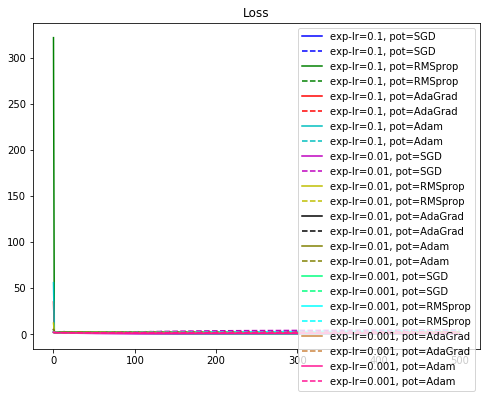

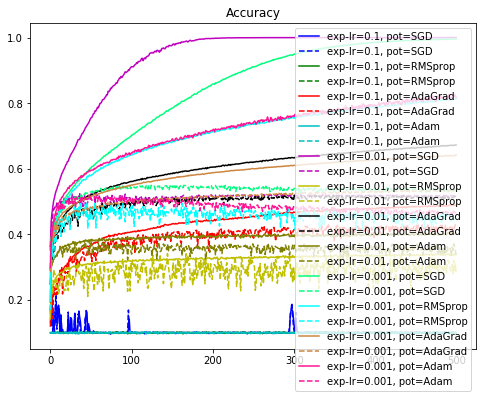

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'olive', 'springgreen', 'cyan', 'peru', 'deeppink'] #["r", "g", "b", "y", "m", "k", "o", "p"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()